
<h4>Edge Detection<h4>
<span style="font-weight:normal">
<font face="verdana">Edge Detectors use gradient approximations to calculate gradients used as detectors for edges
</font>
</span>








In [9]:
import numpy as np
import scipy.ndimage as ndi
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt,laplace
import matplotlib.pyplot as plt
import cv2

from skimage.filters import laplace,sobel,roberts
import scipy.ndimage as ndi
from skimage import feature
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import pymeanshift as pms


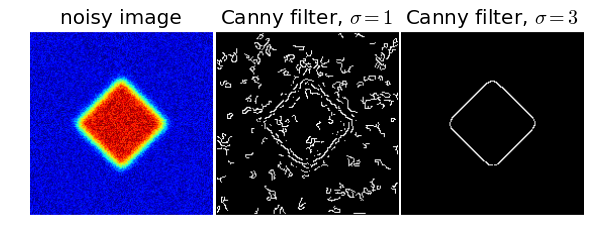

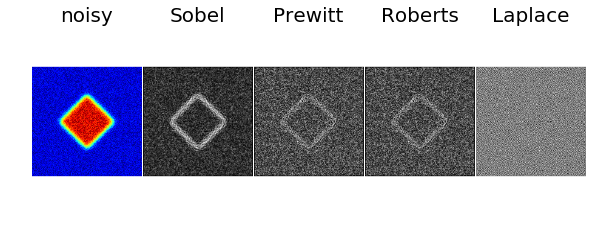

In [10]:
%matplotlib inline

im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 25, mode='constant')
im = ndi.gaussian_filter(im, 4) 
im += 0.2 * np.random.random(im.shape)


# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

sobel=sobel(im)
prewitt = prewitt(im)  
roberts = roberts(im)
laplace = laplace(im)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
fig1, (ax11, ax12, ax13, ax14, ax15) = plt.subplots(nrows=1, ncols=5, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

ax11.imshow(im, cmap=plt.cm.jet)
ax11.axis('off')
ax11.set_title('noisy', fontsize=20)

ax12.imshow(sobel, cmap=plt.cm.gray)
ax12.axis('off')
ax12.set_title('Sobel',  fontsize=20)

ax13.imshow(roberts, cmap=plt.cm.gray)
ax13.axis('off')
ax13.set_title('Prewitt',  fontsize=20)

ax14.imshow(roberts, cmap=plt.cm.gray)
ax14.axis('off')
ax14.set_title('Roberts',  fontsize=20)

ax15.imshow(laplace, cmap=plt.cm.gray)
ax15.axis('off')
ax15.set_title('Laplace',  fontsize=20)

fig1.subplots_adjust(wspace=0.02, hspace=0.10, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)
plt.show()




In [ ]:
<h4>The canny filter consists of a sequence of stesps</h4>

# linear filters can be used to estimate gradients or first derivatives
#http://www.cs.cornell.edu/workshop/curie2015/filtering.pdf

Assume the linear filter is called a kernel with a default size of 3x3
filtering can be called cross-correlation. Convolution introduces a 180 shift and is the same as Cross correlation 
if the convolution matrix is symmetrical

Correlation calculation is the sum of the kernel weights times the pixel values of the image
In Andrew Ng's convolution slides not stated the kernel is symmetric even though it is so in that example convolution 
is the same as cross correlation



horizontal partial derivative filter
these filters have negative weights and use double precision math; not integers

horiz = np.array([[0,0,0],[-1,0,1],[0,0,0]])
horiz_kernel = np.multiply(.5,horiz) 

vert = np.array([[0,-1,0],[0,0,0],[0,1,0]])
vert_kernel = np.multiply(0.5,vert)

The thick edges are artifacts of threhsholding. When we take a first derivative we get a peak. The width of the peak corresponds to the thickness of the line. 
taken from http://www.owlnet.rice.edu/~elec539/Projects97/morphjrks/laplacian.html

<img src = 'week11/derivative.png'>

<img src = 'week11/derivativepeak.png'>

To reduce the thickness of the lines we can use the second derivative. The problem with the second derivative is with false edges generated from artificial 0 crossings from pre gaussian noise filterering. 











#use vert_kernel and horiz_kernel to compute gradient magnitude
grad_mag = np.sqrt(np.add(np.multiply(vert_kernel,vert_kernel), np.multiply(horiz_kernel,horiz_kernel)))

#sobel, roberts, prewitt 1d gradients
#sobel uses [[-1,0,1],[-2,0,2],[-1,0,1]] for x and [[1,2,1],[0,0,0],[-1,-2,-1]] for y










<h4>test image segmentation using edge detection on a real iphone camera image<h4>
<img src="IMG_1580.JPG" style="width: 25%; height: 25%">

<p>We should see an image above. There is no error message or timeout if the image doesn't load via imread in the cell below'</p>

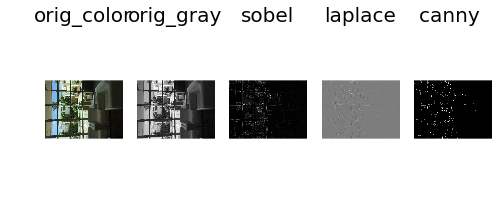

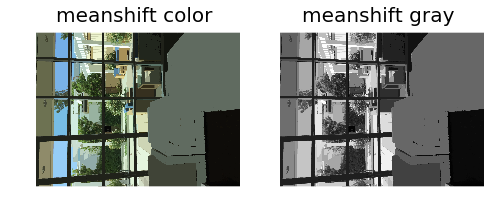

In [6]:
%matplotlib inline

from skimage.filters import laplace,sobel,roberts
import scipy.ndimage as ndi
from skimage import feature
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2
import pymeanshift as pms


color_img =  ndi.imread('IMG_1580.jpg')
img = rgb2gray(color_img)

#print img
#print img.shape
sobel_show = sobel(img)
laplace_show = laplace(img)
canny_show = feature.canny(img, sigma=3)

mean_shift_img = cv2.imread("IMG_1580.jpg")
(segmented_color, labels_image, number_regions) = pms.segment(color_img, spatial_radius=6, 
                                                              range_radius=4.5, min_density=50)


segmented_gray = rgb2gray(segmented_color)


fig2,(i0,i1,i2,i3,i4) = plt.subplots(nrows=1, ncols=5, figsize=(8, 3), sharex=True, sharey=True)
fig3,(i5,i6) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)


i0.imshow(color_img)
i0.axis('off')
i0.set_title('orig_color',  fontsize=20)

i1.imshow(img, cmap=plt.cm.gray)
i1.axis('off')
i1.set_title('orig_gray',  fontsize=20)


i2.imshow(sobel_show, cmap=plt.cm.gray)
i2.axis('off')
i2.set_title('sobel',  fontsize=20)

i3.imshow(laplace_show, cmap=plt.cm.gray)
i3.axis('off')
i3.set_title('laplace',  fontsize=20)

i4.imshow(canny_show, cmap=plt.cm.gray)
i4.axis('off')
i4.set_title('canny ',  fontsize=20)

i5.imshow(segmented_color, cmap=plt.cm.gray)
i5.axis('off')
i5.set_title('meanshift color ',  fontsize=20)

i6.imshow(segmented_gray, cmap=plt.cm.gray)
i6.axis('off')
i6.set_title('meanshift gray ',  fontsize=20)

plt.show()

<p>You can see the edge detection algorithms don't work for segmentation in contrast to the created image</p>
<p>We can see an example of image segmentation using meanshift, the edges in the window frame are preserved</p>

In [ ]:
#example using meanshift for lane segmentation
#creating a benchmark? alternatives besides human segmentation? 
#run vs. current benchmarks. 

#texture detection for off road safe places to pull off car? 
#object detection for possible collision (object detection and motion estimation next lecture)
#


